In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Checking city_data
#city_data_df.count()
#city_data_df.isnull().sum()
#city_data_df.dtypes
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Get unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
# Get number of data points for Urban Cities
city_data_df.groupby('type').count()#.plot(kind='bar')

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [7]:
# Checking ride_data
#ride_data_df.count()
#ride_data_df.isnull().sum()
#ride_data_df.dtypes
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [8]:
# Left Join city_data to ride_data
pyber_data_df = pd.merge(ride_data_df,city_data_df,how='left',left_on=['city'],right_on=['city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# Create the DataFrame for each type of city
urban_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [15]:
# Get the number of rides for each DataFrame for city type
urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_df.groupby(['city']).count()['ride_id']

In [19]:
# Get the average fare for each city
urban_avg_fare = urban_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_df.groupby(['city']).mean()['fare']

In [25]:
# Get the average number of drivers for each city
urban_driver_count = urban_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_df.groupby(['city']).mean()['driver_count']

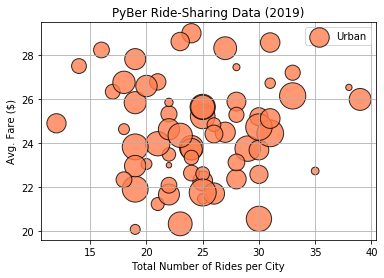

In [35]:
# Build the scatter plots for Urban cities
plt.scatter(urban_ride_count, urban_avg_fare
            ,label = 'Urban'
            ,s=urban_driver_count * 10
            ,color = 'coral'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Avg. Fare ($)')
plt.grid(True)
plt.legend()
plt.show()

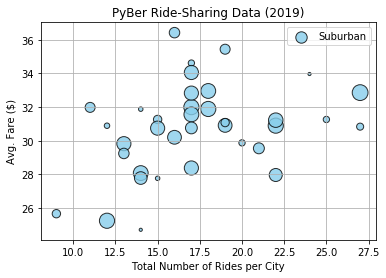

In [36]:
# Build the scatter plots for Suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare
            ,label = 'Suburban'
            ,s=suburban_driver_count * 10
            ,color = 'skyblue'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Avg. Fare ($)')
plt.grid(True)
plt.legend()
plt.show()

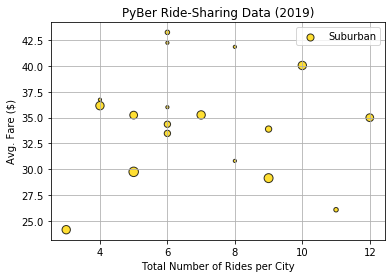

In [38]:
# Build the scatter plots for Rural cities
plt.scatter(rural_ride_count, rural_avg_fare
            ,label = 'Suburban'
            ,s=rural_driver_count * 10
            ,color = 'gold'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Avg. Fare ($)')
plt.grid(True)
plt.legend()

plt.show()

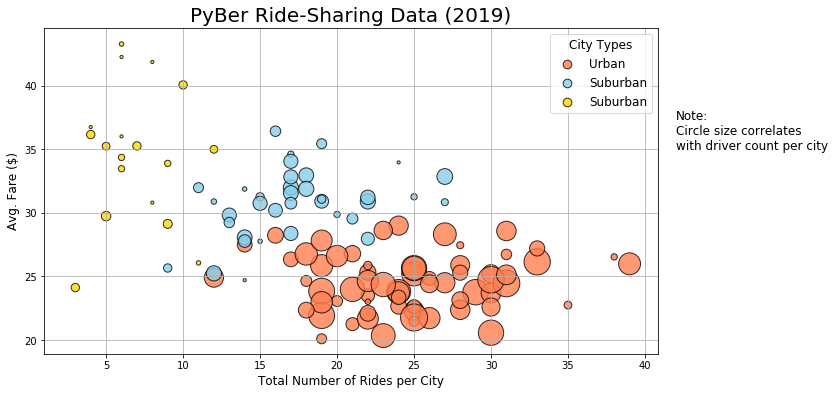

In [54]:
# Prepare Figure and setting size
plt.subplots(figsize=(11,6))

# Add the scatter charts for each type of city
plt.scatter(urban_ride_count, urban_avg_fare
            ,label = 'Urban'
            ,s=urban_driver_count * 10
            ,color = 'coral'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )

plt.scatter(suburban_ride_count, suburban_avg_fare
            ,label = 'Suburban'
            ,s=suburban_driver_count * 10
            ,color = 'skyblue'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )

plt.scatter(rural_ride_count, rural_avg_fare
            ,label = 'Suburban'
            ,s=rural_driver_count * 10
            ,color = 'gold'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )

# Other graph properties
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides per City', fontsize=12)
plt.ylabel('Avg. Fare ($)', fontsize=12)
plt.grid(True)

# Preparing Legends
lgnd = plt.legend(fontsize=12,mode="Expanded",loc='best',scatterpoints=1,title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Adding Notes
plt.text(42,35,'Note:\nCircle size correlates\nwith driver count per city',fontsize=12)

plt.savefig('Analysis/Fig1.png')

plt.show()